In [73]:
import pandas as pd
col =  ["NOP","Plasma","BP","TSKIN_THICKNESS","SERUM_INSULIN","BMI","PEDIGREE","AGE","Target"]
diabetes = pd.read_csv("datasets/Diabetes/pima-indians-diabetes.csv",names = col)

In [4]:
diabetes[5:12]

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1


In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes_target = diabetes['Target']

In [7]:
diabetes_target.head()

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

In [8]:
diabetes_target.shape

(768,)

In [9]:
diabetes_data = diabetes.drop(columns='Target')

In [10]:
diabetes_data.head()

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
NOP                768 non-null int64
Plasma             768 non-null int64
BP                 768 non-null int64
TSKIN_THICKNESS    768 non-null int64
SERUM_INSULIN      768 non-null int64
BMI                768 non-null float64
PEDIGREE           768 non-null float64
AGE                768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [12]:
diabetes_data.describe()

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [60]:
# lets work on data as it as without separating target value
import pandas as pd
col =  ["NOP","Plasma","BP","TSKIN_THICKNESS","SERUM_INSULIN","BMI","PEDIGREE","AGE","Target"]
diabetes = pd.read_csv("datasets/Diabetes/pima-indians-diabetes.csv",names = col)

In [17]:
from matplotlib import pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115020ac8>,
      dtype=object)

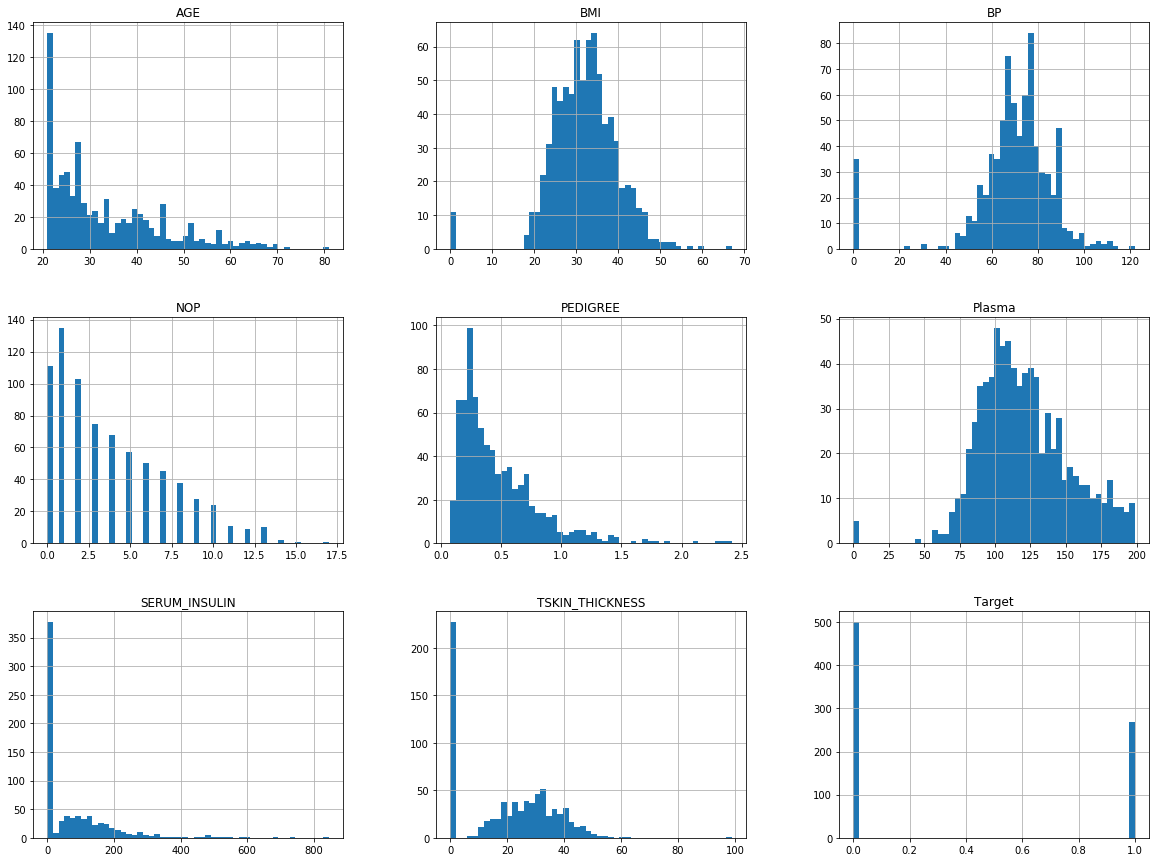

In [19]:
diabetes.hist(bins=50,figsize=(20,15))

In [20]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
train_set,test_set = split_train_test(diabetes,0.2)

In [22]:
print("train", len(train_set) , "test" , len(test_set))

train 615 test 153


In [23]:
train_set.head()

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
462,8,74,70,40,49,35.3,0.705,39,0
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0


In [24]:
type(diabetes)

pandas.core.frame.DataFrame

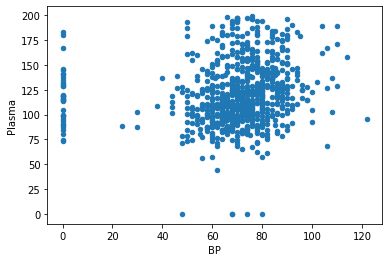

In [25]:
diabetes.plot(kind="scatter",x = "BP", y ="Plasma")

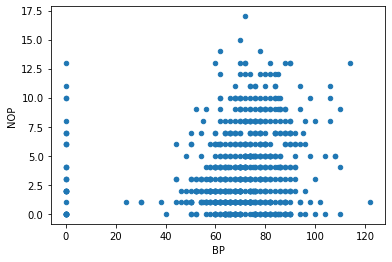

In [26]:
diabetes.plot(kind="scatter",x = "BP", y ="NOP")

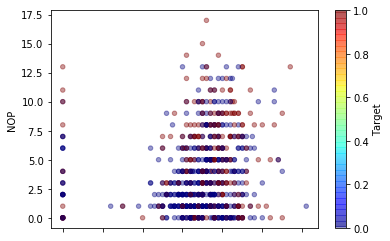

In [30]:
diabetes.plot(kind="scatter",x="BP",y="NOP",alpha=0.4, c="Target", cmap=plt.get_cmap("jet"),colorbar=True,)

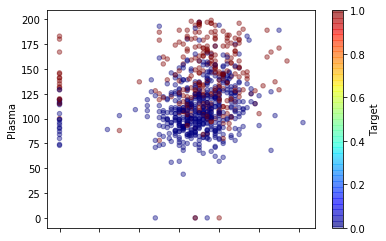

In [31]:
diabetes.plot(kind="scatter",x="BP",y="Plasma",alpha=0.4, c="Target", cmap=plt.get_cmap("jet"),colorbar=True,)

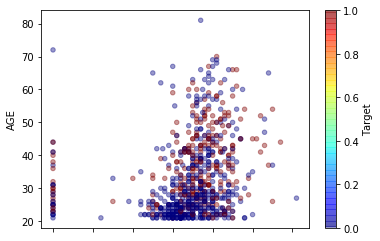

In [33]:
diabetes.plot(kind="scatter",x="BP",y="AGE",alpha=0.4, c="Target", cmap=plt.get_cmap("jet"),colorbar=True,)

In [34]:
correlation_matrix = diabetes.corr()

In [35]:
correlation_matrix

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
NOP,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
TSKIN_THICKNESS,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
SERUM_INSULIN,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
PEDIGREE,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
AGE,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Target,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [37]:
correlation_matrix["Target"].sort_values(ascending=False)

Target             1.000000
Plasma             0.466581
BMI                0.292695
AGE                0.238356
NOP                0.221898
PEDIGREE           0.173844
SERUM_INSULIN      0.130548
TSKIN_THICKNESS    0.074752
BP                 0.065068
Name: Target, dtype: float64

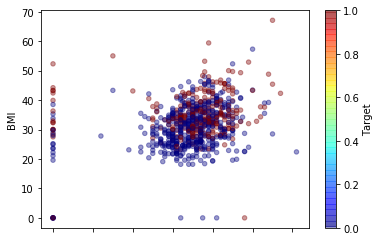

In [38]:
diabetes.plot(kind="scatter",x="BP",y="BMI",alpha=0.4, c="Target", cmap=plt.get_cmap("jet"),colorbar=True,)

It seems Diabetes has a fair corelation with Plasma and little bit with BMI but graph does not show much relation with others. Will remove outliers also later for NOP and age

In [41]:
from pandas.plotting import scatter_matrix
attributes = ["Target","Plasma","BMI","AGE"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a0882e8>,
      dtype=object)

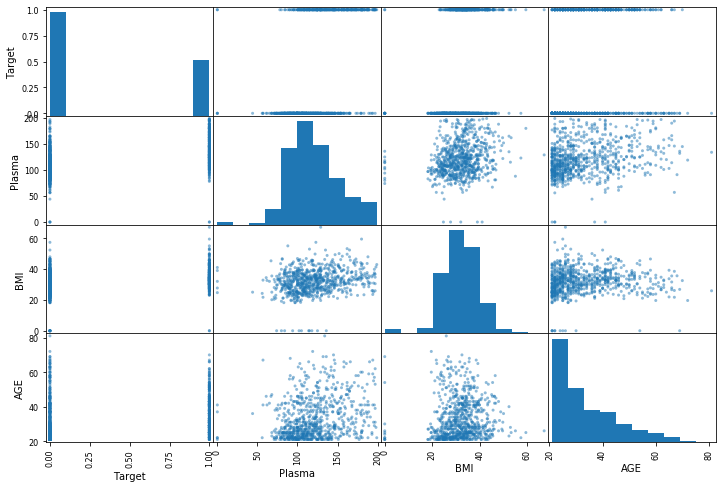

In [42]:
scatter_matrix(diabetes[attributes],figsize=(12,8))

In [83]:
# Cleaning the data, remove data of 0 BMI

diabetes_cleaned = diabetes[diabetes["BMI"]>0]

In [84]:
diabetes_cleaned.shape

(757, 9)

In [85]:
diabetes_cleaned = diabetes_cleaned[diabetes_cleaned["BP"]>0] # remove data of 0 BP

In [86]:
diabetes_cleaned.shape

(729, 9)

In [87]:
diabetes_cleaned = diabetes_cleaned[diabetes_cleaned["Plasma"]>0] # remove data of 0 Plasma

In [88]:
diabetes_cleaned.shape

(724, 9)

In [90]:
diabetes[diabetes["SERUM_INSULIN"]>0].count()

NOP                394
Plasma             394
BP                 394
TSKIN_THICKNESS    394
SERUM_INSULIN      394
BMI                394
PEDIGREE           394
AGE                394
Target             394
dtype: int64

### Not removing 0 insulin as it will reduce data alomst to half

In [72]:
diabetes_cleaned.shape

(392, 9)

In [91]:
diabetes[diabetes["TSKIN_THICKNESS"]>0].count()

NOP                541
Plasma             541
BP                 541
TSKIN_THICKNESS    541
SERUM_INSULIN      541
BMI                541
PEDIGREE           541
AGE                541
Target             541
dtype: int64

### Also not removing tskin as it has 541 count and data will be reduced very much

In [92]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
NOP                724 non-null int64
Plasma             724 non-null int64
BP                 724 non-null int64
TSKIN_THICKNESS    724 non-null int64
SERUM_INSULIN      724 non-null int64
BMI                724 non-null float64
PEDIGREE           724 non-null float64
AGE                724 non-null int64
Target             724 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.6 KB


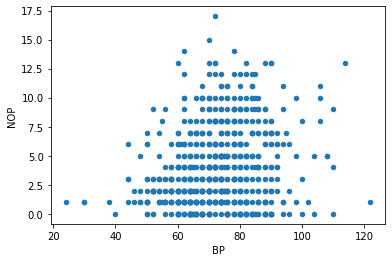

In [93]:
diabetes_cleaned.plot(kind="scatter",x = "BP", y ="NOP")

In [99]:
df_nop = diabetes_cleaned[diabetes_cleaned["NOP"]>12].shape

In [102]:
diabetes_cleaned[diabetes_cleaned["NOP"]>13]

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [103]:
# lets remove NOP 17 outlier 
diabetes_cleaned = diabetes_cleaned[diabetes_cleaned["NOP"]<17]

In [104]:
diabetes_cleaned.shape

(723, 9)

In [110]:
diabetes_cleaned[diabetes_cleaned["AGE"]>65]

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
123,5,132,80,0,0,26.8,0.186,69,0
221,2,158,90,0,0,31.6,0.805,66,1
363,4,146,78,0,0,38.5,0.520,67,1
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
495,6,166,74,0,0,26.6,0.304,66,0
537,0,57,60,0,0,21.7,0.735,67,0
552,6,114,88,0,0,27.8,0.247,66,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0


In [ ]:
# LETS keep all ages

In [111]:
diabetes_cleaned_target = diabetes_cleaned["Target"]

In [112]:
diabetes_cleaned_target.shape

(723,)

In [113]:
diabetes_cleaned_data = diabetes_cleaned.drop(columns='Target')

In [114]:
diabetes_cleaned_data.shape

(723, 8)

In [ ]:
#Coverting to numpy array to use scikit

In [115]:
diabetes_data = np.array(diabetes_cleaned_data)

In [116]:
diabetes_data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [117]:
diabetes_target=np.array(diabetes_cleaned_target)

In [119]:
diabetes_target.shape

(723,)

In [121]:
X= diabetes_data
y = diabetes_target

In [122]:
X_train,X_test, y_train,y_test = X[:700],X[700:],y[:700],y[700:]

In [123]:
import numpy as np
shuffle_index = np.random.permutation(700)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [124]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [125]:
X_test[5],y_test[5]

(array([  4.   , 136.   ,  70.   ,   0.   ,   0.   ,  31.2  ,   1.182,
         22.   ]), 1)

In [127]:
sgd_clf.predict([X_test[5]])

array([1])

In [128]:
from sklearn.metrics import accuracy_score

In [130]:
y_train_predict = sgd_clf.predict(X_train)

In [131]:
accuracy_score(y_train,y_train_predict)

0.6614285714285715

In [132]:
# cross validation score
from sklearn.model_selection import cross_val_score

In [133]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring = "accuracy")

array([0.45299145, 0.33905579, 0.59656652])

In [134]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train,cv=3)

In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[133, 330],
       [ 46, 191]])

In [137]:
from sklearn.metrics import precision_score,recall_score

In [138]:
precision_score(y_train,y_train_pred)

0.3666026871401152

In [139]:
recall_score(y_train,y_train_pred)

0.8059071729957806

In [140]:
from sklearn.metrics import f1_score

In [142]:
f1_score(y_train,y_train_pred)

0.503957783641161

In [252]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train,cv=3, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores) 

In [175]:
precisions.shape,recalls.shape,thresholds.shape,y_scores.shape

((698,), (698,), (697,), (700,))

In [188]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label = "Precision")
    plt.plot(thresholds, recalls[:-1],"g-",label = "Recall")
    plt.xlabel("Thresholds")
    plt.legend(loc="upper left")
    plt.ylim([0,2])
    #plt.xlim([0,25000])

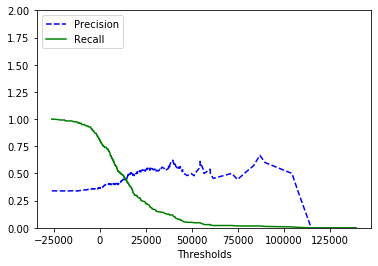

In [189]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [190]:
y_train_pred_updated_threshold = (y_scores > 12000)

In [191]:
precision_score(y_train,y_train_pred_updated_threshold)

0.4344569288389513

In [192]:
recall_score(y_train,y_train_pred_updated_threshold)

0.48945147679324896

In [193]:
f1_score(y_train,y_train_pred_updated_threshold)
# not better

0.46031746031746035

In [182]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train, y_scores)

In [183]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    # x and corresponding y ex. [x1,x2] and [y1,y2]
    plt.plot([0,1],[0,1],'k--')
    # axis xmin,xmax,ymin,ymax
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    

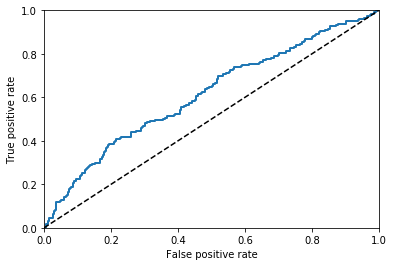

In [184]:
plot_roc_curve(fpr,tpr)

In [185]:
# area under the curve AKA ROC AUC(area under the curve)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.6127438918810546

## compare models

In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [247]:
names = []
scores = []

def getModelScore(models,X_train,y_train,X_test,y_test):
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test,y_pred)
        scores.append(score)
        names.append(model)
    return scores,names
    
    


In [248]:
scores,names = getModelScore(models,X_train,y_train,X_test,y_test)

/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [249]:
len(models)

7

In [250]:
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

                                                Name     Score
0  KNeighborsClassifier(algorithm='auto', leaf_si...  0.869565
1  SVC(C=1.0, cache_size=200, class_weight=None, ...  0.521739
2  LogisticRegression(C=1.0, class_weight=None, d...  0.869565
3  DecisionTreeClassifier(class_weight=None, crit...  0.782609
4       GaussianNB(priors=None, var_smoothing=1e-09)  0.695652
5  (DecisionTreeClassifier(class_weight=None, cri...  0.739130
6  ([DecisionTreeRegressor(criterion='friedman_ms...  0.869565


### SOME RANDOM AND UNEXPECTED RESULTS ABOVE, i wonder what i did wrong

In [274]:


def getModelScoreCV(models,X_train,y_train,X_test,y_test):
    for name, model in models:
        model.fit(X,y)
        score = cross_val_score(model,X,y,cv=3,scoring="accuracy").mean()
        scores.append(score)
        names.append(model)
    return scores,names
    

In [275]:
names = []
scores = []
scores,names = getModelScoreCV(models,X_train,y_train,X_test,y_test)


/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ushadevi/Desktop/venv/lib/pyth

In [276]:
tr_split = pd.DataFrame({'Name': names, 'Score': scores})


In [277]:
print(tr_split)

                                                Name     Score
0  KNeighborsClassifier(algorithm='auto', leaf_si...  0.708151
1  SVC(C=1.0, cache_size=200, class_weight=None, ...  0.656987
2  LogisticRegression(C=1.0, class_weight=None, d...  0.760803
3  DecisionTreeClassifier(class_weight=None, crit...  0.688822
4       GaussianNB(priors=None, var_smoothing=1e-09)  0.740044
5  (DecisionTreeClassifier(class_weight=None, cri...  0.741370
6  ([DecisionTreeRegressor(criterion='friedman_ms...  0.759385


In [294]:
from sklearn.metrics import roc_auc_score
models = []

models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))

def getROCScoreModels(models,X,y):
    for name, model in models:
        model.fit(X,y)
        y_scores = cross_val_predict(model,X,y,cv=3, method="decision_function")
        score = roc_auc_score(y, y_scores)
        scores.append(score)
        names.append(name)
    return scores,names

In [295]:
names = []
scores = []
scores,names = getROCScoreModels(models,X,y)

/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ushadevi/Desktop/venv/lib/pyth

In [296]:
tr_split = pd.DataFrame({'Name': names, 'Score': scores})

In [297]:
tr_split

,Name,Score
0,SVC,0.565174
1,LR,0.816163
